### **Perceptron Implementation**

**Load dataset and IMport libraries**


In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


**Test Train split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1, stratify=y)


In [ ]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


**Standardizing training data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**Fit the model**

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0 = 0.1, random_state = 1)
p.fit(X_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

**Predict**

In [ ]:
y_pred = p.predict(X_test_std)
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 1


**Metrics**

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Accuracy: 0.978


In [ ]:
print(f'Accuracy:{p.score(X_test_std, y_test):.3f}')

Accuracy:0.978


**Visualization**

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y , classifier, test_idx =None, resolution = 0.02):
  # setup marker generator and color map
  markers = ('o','s','^','v','<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot the decision surface
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() +1
  x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1

  xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max,resolution))

  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1,xx2, lab, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot class examples
  for idx, cl in enumerate (np.unique(y)):
    plt.scatter(x = X[y == cl, 0],
                y = X[y== cl, 1],
                alpha = 0.8,
                c= colors[idx],
                marker = markers[idx],
                label =f'Class{cl}',
                edgecolor = 'black')
    #hilight test examples
    if test_idx:
      #plot all examples
      X_test, y_test = X[test_idx,:], y[test_idx]
      plt.scatter(X_test[:,0],
                  X_test[:,1],
                  c='none',
                  edgecolor ='black',
                  alpha = 1.0,
                  linewidth = 1,
                  marker = 'o',
                  s = 100,
                  label = 'Test Set')





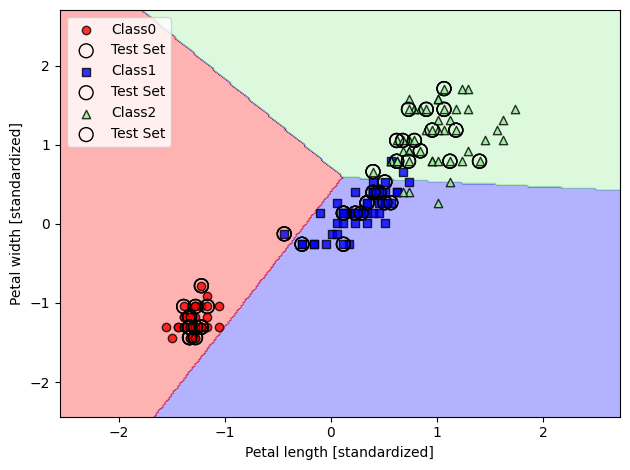

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier = p,
                      test_idx = range (105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

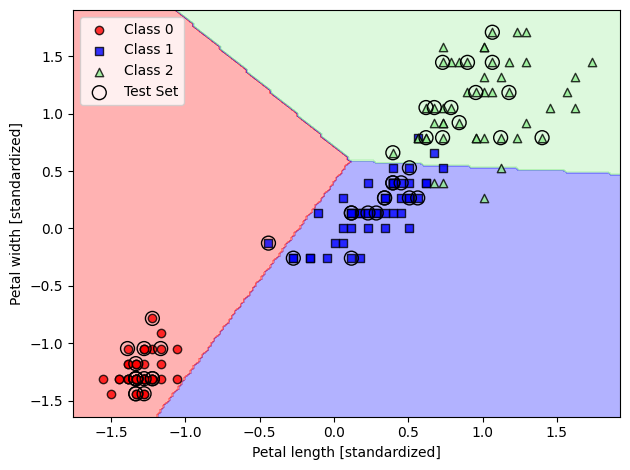

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  """Plots the decision boundaries of a classifier on a 2D dataset.

  Args:
    X (array-like): Feature matrix of shape [n_examples, n_features].
    y (array-like): Target labels of shape [n_examples].
    classifier (object): A trained classifier object with a 'predict' method.
    test_idx (array-like, optional): Indices of test samples to highlight. Defaults to None.
    resolution (float, optional): Step size for the grid of the decision surface. Defaults to 0.02.
  """

  # Setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<') # Define different marker styles for different classes
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # Define colors for different classes
  cmap = ListedColormap(colors[:len(np.unique(y))]) # Create a custom colormap based on the number of unique classes in y

  # Plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2 # Determine the range of the first feature (with a small margin)
  x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2 # Determine the range of the second feature (with a small margin)

  # Create a grid of points within the feature range
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  # Predict the class label for each point in the grid
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # Flatten the grid coordinates and predict
  lab = lab.reshape(xx1.shape) # Reshape the predictions back into the grid shape

  # Fill the decision regions with colors based on the predictions
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) # Use contourf to create filled regions
  plt.xlim(xx1.min(), xx1.max()) # Set the x-axis limits
  plt.ylim(xx2.min(), xx2.max()) # Set the y-axis limits

  # Plot class examples
  for idx, cl in enumerate(np.unique(y)): # Iterate through each unique class
    plt.scatter(x=X[y == cl, 0], # Select data points belonging to the current class for the first feature
                y=X[y == cl, 1], # Select data points belonging to the current class for the second feature
                alpha=0.8, # Set transparency of the points
                c=colors[idx], # Use the color corresponding to the class index
                marker=markers[idx], # Use the marker style corresponding to the class index
                label=f'Class {cl}', # Set the label for the legend
                edgecolor='black') # Set the edge color of the markers

  # Highlight test examples if test_idx is provided
  if test_idx:
    # Plot all examples in the test set
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='none', # Don't fill the markers
                edgecolor='black', # Set the edge color to black
                alpha=1.0, # Make the test set markers fully opaque
                linewidth=1, # Set the linewidth of the marker edges
                marker='o', # Use a circle marker for test samples
                s=100, # Set the size of the marker
                label='Test Set') # Label for the test set in the legend

# Assuming you have your training data (X_train_std, y_train) and test data (X_test_std, y_test)
# and a trained classifier 'p' (e.g., your Perceptron or Adaline model)

# Combine training and test data for plotting the overall decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Call the plot_decision_regions function
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=p,
                      test_idx=range(105, 150)) # Assuming indices 105 to 149 are your test set in the combined data
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1]:
!sudo apt-get update
!sudo apt-get install texlive-xetex pandoc

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,681 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [2]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/Machine_Learning/1.Perceptron.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Machine_Learning/1.Perceptron.ipynb to pdf
[NbConvertApp] Support files will be in 1.Perceptron_files/
[NbConvertApp] Making directory ./1.Perceptron_files
[NbConvertApp] Writing 66974 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 147523 bytes to /content/drive/MyDrive/Colab_Notebooks/Machine_Learning/1.Perceptron.pdf
